# Held-Karp algorithm that reduces with complexity O(n^22^n)

In [1]:
using Combinatorics
using Plots
using BenchmarkTools

In [2]:
numb = 5
X = rand(numb)
Y = rand(numb)
D = [sqrt((X[i]-X[j])^2 + (Y[i]-Y[j])^2) for j = 1:length(X), i = 1:length(X)];

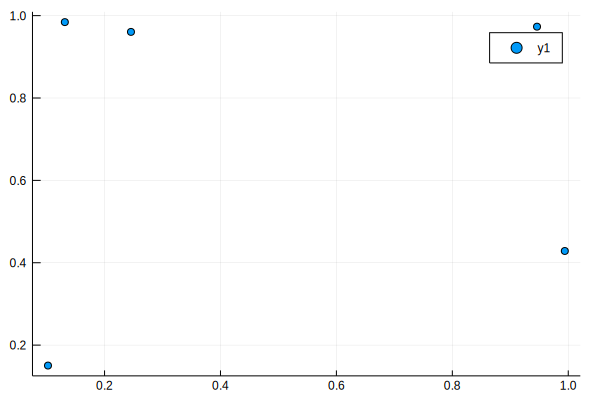

In [3]:
scatter(X,Y)

In [2]:
function cost(a, n, D, phi = 1)
    d = Inf
    counter = size(D,1) + 1 - length(n)
    if length(n) == 1
        d = D[a,n[1]] + D[n[1],phi]
        order_array[counter] = a
    else
        for i = 1:length(n)
            temp_d = D[a,n[i]] + cost(n[i], n[1:end .!= i], D, phi)
            if temp_d < d
                d = temp_d
                order_array[counter] = a
            end
        end
    end
    return d
end

cost (generic function with 2 methods)

In [3]:
function Held_Karp(D)
    n = size(D,1)
    C2 = zeros(n-1,1)
    for k = 2:n
        C2[k-1,1] = D[1,k]
    end

    sub_sets2 = 2:n
    row = 0
    col = 0

    for s = 2:n-1

        sub_sets1 = combinations(2:n,s)
        ind = factorial(n-1)/(factorial(s)*factorial(n-1-s))
        C1 = zeros(ind,s)
        flag = 1

        for S in sub_sets1
            for k in S
                dist = Inf
                index = findfirst(S,k)
                for m in S
                    if m != k
                        row = Bool[S[1:end .!= index]==sub_sets2[i,:] for i=1:size(sub_sets2,1) ]
                        col = Bool[sub_sets2[row,i]==[m] for i=1:s-1]
                        temp_dist = D[Int(m),Int(k)] + C2[ row,col] 
                        if  temp_dist[1] < dist
                            dist = temp_dist[1]
                        end
                    end
                end
                C1[flag,index] = dist
            end
            flag = flag + 1
        end
        i = 0
        sub_sets2 = zeros(ind,s)
        for S in sub_sets1
            i = i + 1
            sub_sets2[i,:] = S
        end

        C2 = copy(C1)
    end

    S = 2:n 
    k = 1
    index = findfirst(S,k)
    s = n
    dist = Inf
    for m in S
        if m != k
            row = Bool[S[1:end .!= index]==sub_sets2[i,:] for i=1:size(sub_sets2,1) ]
            col = Bool[sub_sets2[row,i]==[m] for i=1:s-1]
            temp_dist = D[Int(m),Int(k)] + C2[ row,col] 
            if  temp_dist[1] < dist
                dist = temp_dist[1]
            end
        end
    end

    opt = dist
    return opt
end

Held_Karp (generic function with 1 method)

In [4]:
function Held_Karp_with_route(D) # This function returns the route along with the minimuum distance between two points.
    n = size(D,1)
    C2 = zeros(n-1,1)
    R2 = zeros(n-1,1)
    for k = 2:n
        C2[k-1,1] = D[1,k]
    end
    
    sub_sets2 = 2:n
    R2 = 2:n
    row = 0
    col = 0

    for s = 2:n-1
        
        sub_sets1 = combinations(2:n,s)
        ind = factorial(n-1)/(factorial(s)*factorial(n-1-s))
        C1 = zeros(ind,s)
        R1 = zeros(ind,s,s)
        flag = 1
        R_r = 0
        R_c = 0

        for S in sub_sets1
            for k in S
                dist = Inf
                index = findfirst(S,k)
                for m in S
                    if m != k
                        row = Bool[S[1:end .!= index]==sub_sets2[i,:] for i=1:size(sub_sets2,1) ]
                        col = Bool[sub_sets2[row,i]==[m] for i=1:s-1]
                        temp_dist = D[Int(m),Int(k)] + C2[ row,col] 
                        if  temp_dist[1] < dist
                            dist = temp_dist[1]
                            R_r = row
                            R_c = col
                        end
                    end
                end
                C1[flag,index] = dist
                R1[flag,index,1:end-1] = R2[R_r,R_c,:]
                R1[flag,index,end] = k
            end
            flag = flag + 1
        end
        i = 0
        sub_sets2 = zeros(ind,s)
        for S in sub_sets1
            i = i + 1
            sub_sets2[i,:] = S
        end

        C2 = copy(C1)
        R2 = copy(R1)
    end
       
    S = 2:n 
    k = 1
    index = findfirst(S,k)
    s = n
    dist = Inf
    for m in S
        if m != k
            row = Bool[S[1:end .!= index]==sub_sets2[i,:] for i=1:size(sub_sets2,1) ]
            col = Bool[sub_sets2[row,i]==[m] for i=1:s-1]
            temp_dist = D[Int(m),Int(k)] + C2[ row,col] 
            if  temp_dist[1] < dist
                dist = temp_dist[1]
                R_r = row
                R_c = col
            end
        end
    end
    
    opt = dist
    route = R2[row,col,:]
    return opt, route
end

Held_Karp2_with_route (generic function with 1 method)

In [6]:
opt = Held_Karp(D)

3.132480162341563

# Benchmark

In [8]:
numb = 4:2:12
tm_HK = zeros(length(numb))
tm = zeros(length(numb))
n = 0
D = []
order_array = []
for i=1:length(numb)
    X = rand(numb[i])
    Y = rand(numb[i])
    D = [sqrt((X[i]-X[j])^2 + (Y[i]-Y[j])^2) for j = 1:length(X), i = 1:length(X)];
    bm = @benchmark Held_Karp(D)
    tm_HK[i] = minimum(bm.times)/10^3;
    print(numb[i], " ")
end

4 6 8 10 12 

In [9]:
tm_HK

5-element Array{Float64,1}:
   85.122    
 3022.74     
    1.64507e5
    3.95877e6
    9.6027e7 

In [ ]:
for i = 1:length(numb)
    X = rand(numb[i])
    Y = rand(numb[i])
    D = [sqrt((X[i]-X[j])^2 + (Y[i]-Y[j])^2) for j = 1:length(X), i = 1:length(X)];
    order_array = zeros(numb[i],1)
    n = numb[i]
    bm = @benchmark cost(1,1:n,D)
    tm[i] = minimum(bm.times)/10^3;
    print(numb[i], " ")
end

4 6 8 

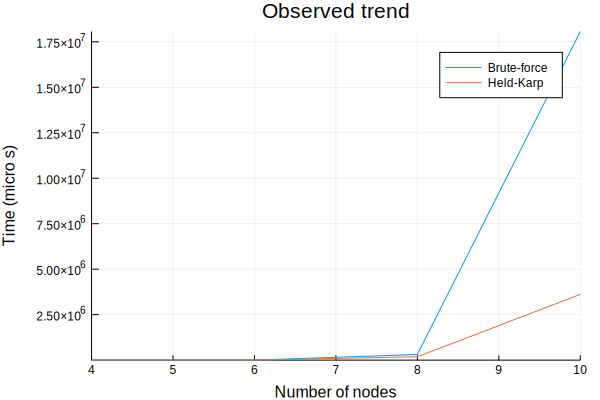

In [7]:
plot(numb,tm, label="Brute-force",xlabel="Number of nodes",ylabel="Time (micro s)", title = "Observed trend")
plot!(numb,tm_HK, label = "Held-Karp")